In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score

import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore")

In [182]:
# Set a random seed for reproducibility
np.random.seed(0)
# Load your  dataset with columns
df = pd.read_csv(r"C:\Users\71589\Desktop\AirPassengers.csv") 

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [183]:
# Make sure your "month" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])

In [184]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [185]:
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')

In [186]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [187]:
# Resetting the index
df.set_index('Month', inplace=True)
 
df.dropna(inplace=True)

In [188]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [189]:
print(df.columns)


Index(['#Passengers'], dtype='object')


In [190]:
print(df.head())  # Shows the first few rows of the DataFrame
print(df.info())  # Provides a summary of the DataFrame, including index, columns, and data types


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


In [191]:
df.columns = df.columns.str.strip()  # Remove trailing spaces from column names
print(df.columns)  # Check column names again


Index(['#Passengers'], dtype='object')


In [192]:
# Decompose the time series seasonal decompose 
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)  # period=12 for monthly data

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


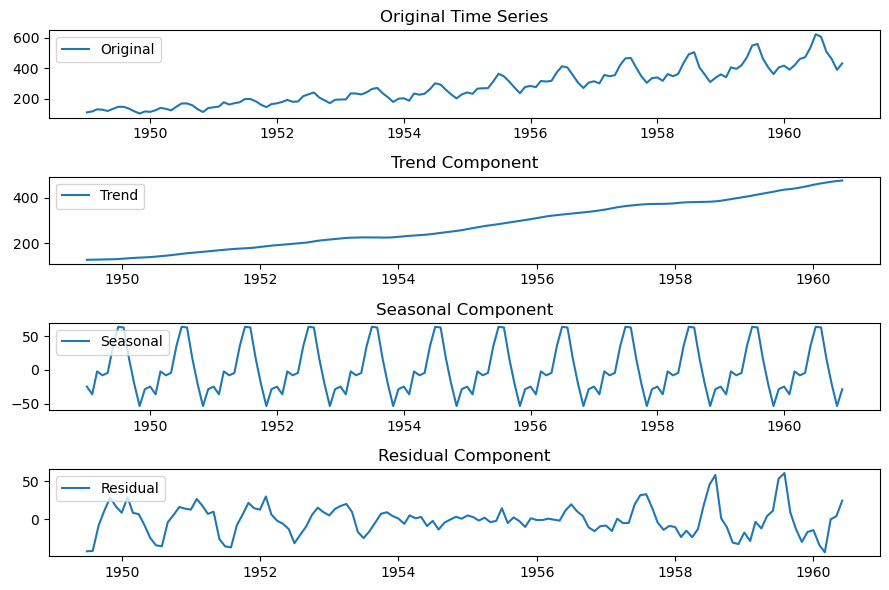

In [193]:
plt.figure(figsize=(9, 6))

plt.subplot(4, 1, 1)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


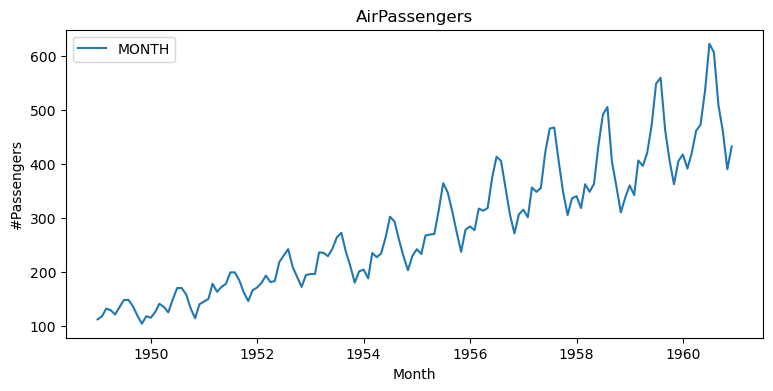

In [194]:
# Plot the '#Passengers' data over time with appropriate labels, legend, and title to visualize the monthly passenger trend
plt.figure(figsize=(9, 4))
plt.plot(df.index, df['#Passengers'], label='MONTH')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.title('AirPassengers')
plt.show()


In [195]:
# Adding lag features to the DataFrame
for i in range(1, 13): # Creating lag features up to 5 days
	df[f'Lag_{i}'] = df['#Passengers'].shift(i)

# Drop rows with NaN values resulting from creating lag features
df.dropna(inplace=True)

# Split the data into training and testing sets
train_size = int(0.8 * len(df)) #80% of the data ,  we dont use the split because we dont want the data to be shuffeld , this is only for time series , we are taking the first 80%
train_data = df[:train_size]
test_data = df[train_size:]

# Define the input features (lag features) and target variable 

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']


In [196]:
df

,#Passengers,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Lag_8,Lag_9,Lag_10,Lag_11,Lag_12
Month,,,,,,,,,,,,,
1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0,559.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0,463.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0


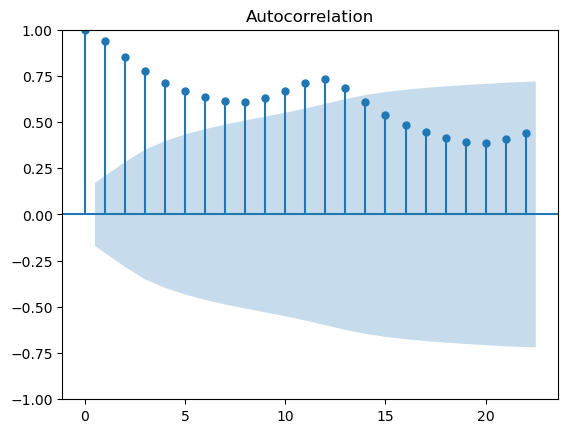

In [197]:
from statsmodels.graphics.tsaplots import plot_acf
series = df['#Passengers'] # Extract the '#Passengers' series from the DataFrame
plot_acf(series) # Plot the autocorrelation function (ACF) to visualize how the series correlates with its lagged versions
plt.show()


In [198]:
for lag in range(1, 20):
    autocorrelation = df['#Passengers'].corr(df['#Passengers'].shift(lag))
    print(f"Lag {lag}: Autocorrelation = {autocorrelation:.4f}")

Lag 1: Autocorrelation = 0.9535
Lag 2: Autocorrelation = 0.8778
Lag 3: Autocorrelation = 0.8092
Lag 4: Autocorrelation = 0.7620
Lag 5: Autocorrelation = 0.7467
Lag 6: Autocorrelation = 0.7430
Lag 7: Autocorrelation = 0.7439
Lag 8: Autocorrelation = 0.7533
Lag 9: Autocorrelation = 0.7960
Lag 10: Autocorrelation = 0.8611
Lag 11: Autocorrelation = 0.9405
Lag 12: Autocorrelation = 0.9890
Lag 13: Autocorrelation = 0.9385
Lag 14: Autocorrelation = 0.8517
Lag 15: Autocorrelation = 0.7753
Lag 16: Autocorrelation = 0.7246
Lag 17: Autocorrelation = 0.7072
Lag 18: Autocorrelation = 0.6976
Lag 19: Autocorrelation = 0.6939


Model Building - autoregressive

In [199]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create and train the autoregressive model - we use it to take the lags 
lag_order = 12 # Adjust this based on the ACF plot
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()


In [231]:
# Make predictions on the test set
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared value: {r2:.2f}')


Mean Absolute Error: 21.29
Root Mean Squared Error: 27.12
R Squared value: 0.88


In [201]:
print(test_data.columns)

Index(['#Passengers', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6',
       'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12'],
      dtype='object')


In [202]:
print(test_data.head())

            #Passengers  Lag_1  Lag_2  Lag_3  Lag_4  Lag_5  Lag_6  Lag_7  \
Month                                                                      
1958-10-01          359  404.0  505.0  491.0  435.0  363.0  348.0  362.0   
1958-11-01          310  359.0  404.0  505.0  491.0  435.0  363.0  348.0   
1958-12-01          337  310.0  359.0  404.0  505.0  491.0  435.0  363.0   
1959-01-01          360  337.0  310.0  359.0  404.0  505.0  491.0  435.0   
1959-02-01          342  360.0  337.0  310.0  359.0  404.0  505.0  491.0   

            Lag_8  Lag_9  Lag_10  Lag_11  Lag_12  
Month                                             
1958-10-01  318.0  340.0   336.0   305.0   347.0  
1958-11-01  362.0  318.0   340.0   336.0   305.0  
1958-12-01  348.0  362.0   318.0   340.0   336.0  
1959-01-01  363.0  348.0   362.0   318.0   340.0  
1959-02-01  435.0  363.0   348.0   362.0   318.0  


In [203]:
test_data.columns = test_data.columns.str.strip()  # Remove any leading/trailing spaces
print(test_data.columns)

Index(['#Passengers', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6',
       'Lag_7', 'Lag_8', 'Lag_9', 'Lag_10', 'Lag_11', 'Lag_12'],
      dtype='object')


In [204]:
test_data.reset_index(drop=True, inplace=True)


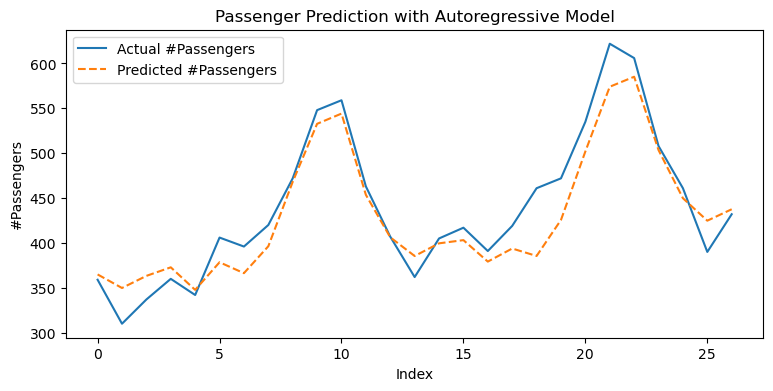

In [205]:
plt.figure(figsize=(9, 4))
plt.plot(test_data.index, y_test, label='Actual #Passengers')
plt.plot(test_data.index, y_pred, label='Predicted #Passengers', linestyle='--')
plt.xlabel('Index')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Passenger Prediction with Autoregressive Model')
plt.show()

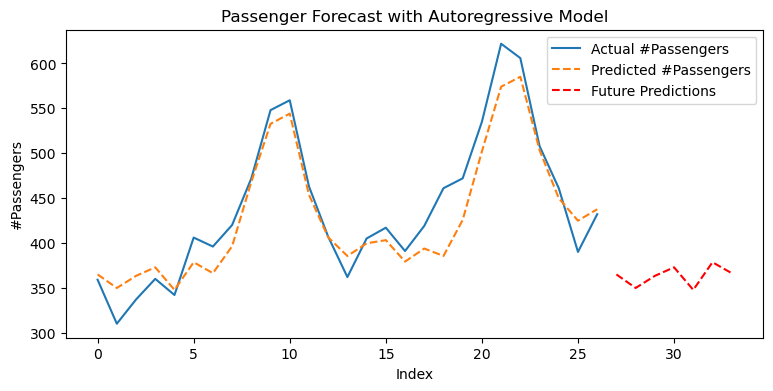

In [206]:
# Define the number of future time steps you want to predict
forecast_steps = 7
# Generate future indices
future_indices = range(len(y_test), len(y_test) + forecast_steps)
# Generate future predictions
future_predictions = ar_results.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, dynamic=False)
# Plot the actual data, existing predictions, and future predictions
plt.figure(figsize=(9, 4))
plt.plot(range(len(y_test)), y_test, label='Actual #Passengers')
plt.plot(range(len(y_test)), y_pred, label='Predicted #Passengers', linestyle='--')
plt.plot(future_indices, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Index')
plt.ylabel('#Passengers')
plt.legend()
plt.title('Passenger Forecast with Autoregressive Model')
plt.show()

In [207]:
# Extract 'Close' column and convert to DataFrame
df = df['#Passengers'].to_frame()

# Calculate 12-day Simple Moving Average (SMA)
df['SMA12'] = df['#Passengers'].rolling(12).mean()

# Remove NULL values
df.dropna(inplace=True)

# Print DataFrame
df


,#Passengers,SMA12
Month,,
1950-12-01,140,139.666667
1951-01-01,145,142.166667
1951-02-01,150,144.166667
1951-03-01,178,147.250000
1951-04-01,163,149.583333
...,...,...
1960-08-01,606,463.333333
1960-09-01,508,467.083333
1960-10-01,461,471.583333


<Axes: xlabel='Month'>

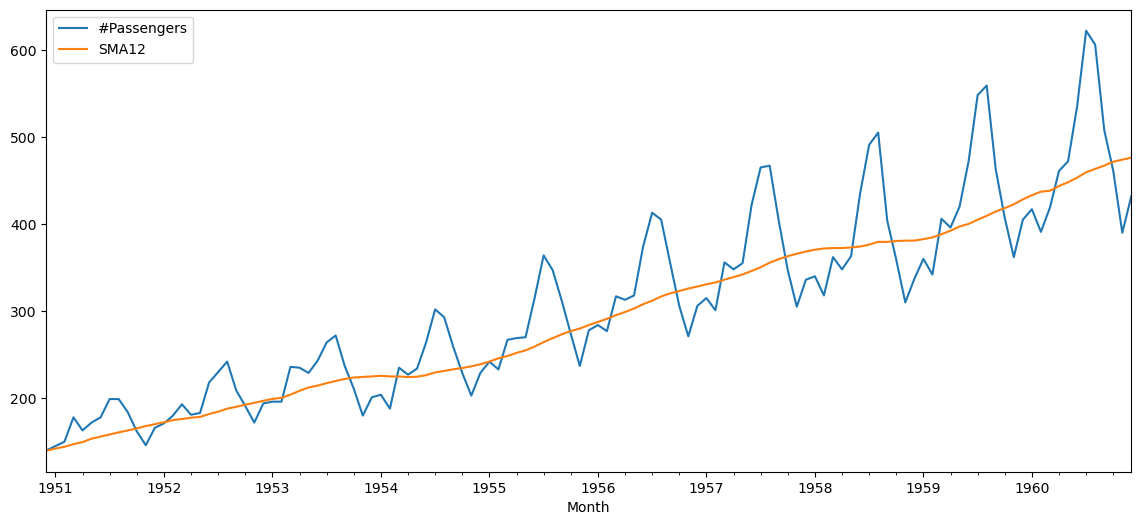

In [208]:
# plotting Close price and simple 
# moving average of 12 days using .plot() method - (trends plot) 
df[['#Passengers', 'SMA12']].plot(label='RELIANCE', 
								figsize=(14, 6))


In [209]:
# Extract and isolate 'Close' column, converting to DataFrame
df = df['#Passengers'].to_frame()

# Calculate Cumulative Moving Average (CMA) with a window of 12
df['CMA12'] = df['#Passengers'].expanding().mean()

# Print DataFrame
df


,#Passengers,CMA12
Month,,
1950-12-01,140,140.000000
1951-01-01,145,142.500000
1951-02-01,150,145.000000
1951-03-01,178,153.250000
1951-04-01,163,155.200000
...,...,...
1960-08-01,606,303.555556
1960-09-01,508,305.288136
1960-10-01,461,306.596639


In [210]:
#diff1 -finding the dif is to make sure if the data is stationary 


Plotting Cumulative Moving Averages

<Axes: xlabel='Month'>

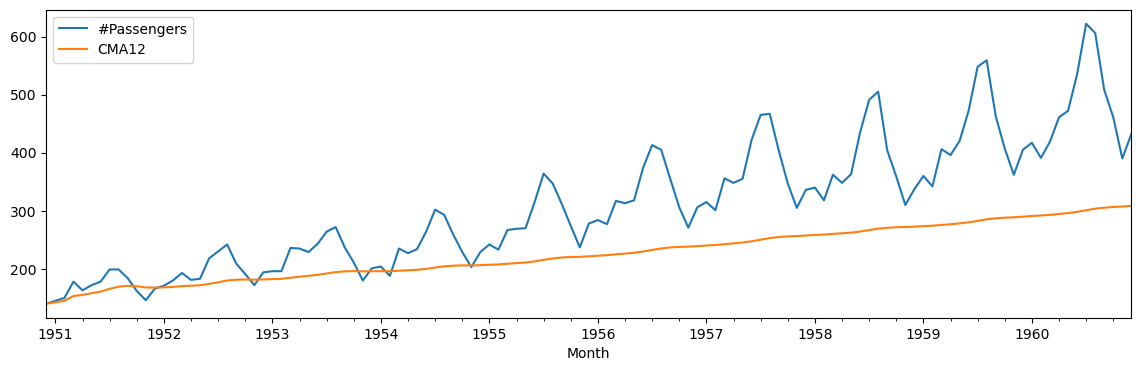

In [211]:
# Plotting the '#Passengers' column and the cumulative moving average (CMA) of 12 days
# using the .plot() method. This helps visualize the trend of passenger numbers over time 
# and how the cumulative moving average smooths out short-term fluctuations to highlight longer-term trends.
df[['#Passengers', 'CMA12']].plot(label='RELIANCE', 
                                  figsize=(14, 4))

Exponential Moving Average


In [212]:
# Extract and isolate the '#Passengers' column from the DataFrame and convert it into a new DataFrame.
# This step prepares the data for further analysis.
df = df['#Passengers'].to_frame()

# Calculate Exponential Moving Average (EWMA) with a span of 12
df['EWMA12'] = df['#Passengers'].ewm(span=12).mean()

# Print DataFrame
df


,#Passengers,EWMA12
Month,,
1950-12-01,140,140.000000
1951-01-01,145,142.708333
1951-02-01,150,145.554273
1951-03-01,178,155.796121
1951-04-01,163,157.753389
...,...,...
1960-08-01,606,494.898621
1960-09-01,508,496.914217
1960-10-01,461,491.388953


Plotting Exponential Moving Averages #

<Axes: xlabel='Month'>

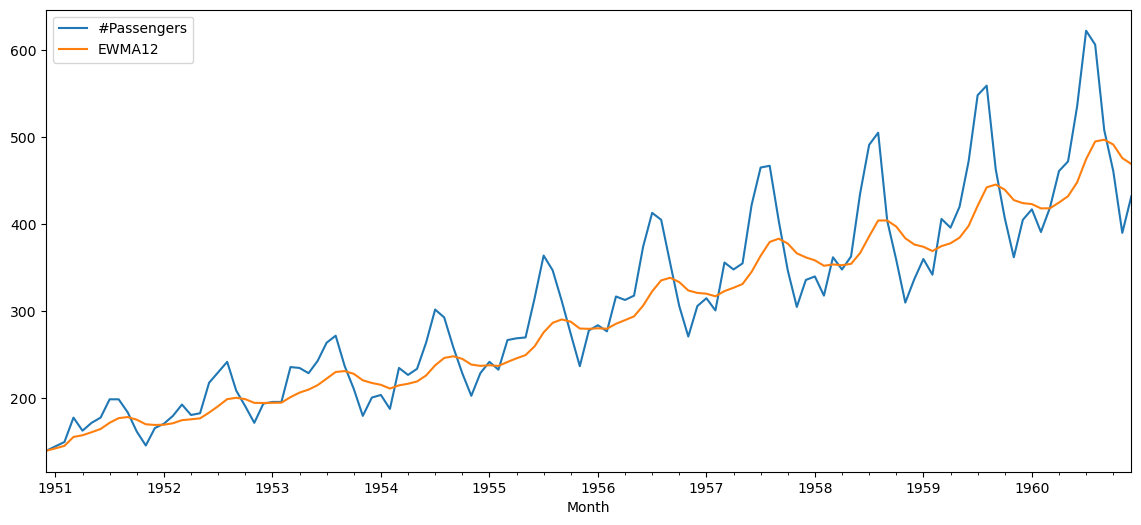

In [213]:
# Plotting the '#Passengers' column along with the 12-day Exponential Moving Average (EWMA)
# using the .plot() method. This visualization helps to compare the actual passenger numbers with the smoothed trend,
# where the EWMA line reflects the trend over the specified period, providing insight into the overall pattern of the data.
df[['#Passengers', 'EWMA12']].plot(label='RELIANCE',
								figsize=(14, 6))


#_______________________________________________________________________

<Axes: xlabel='Month'>

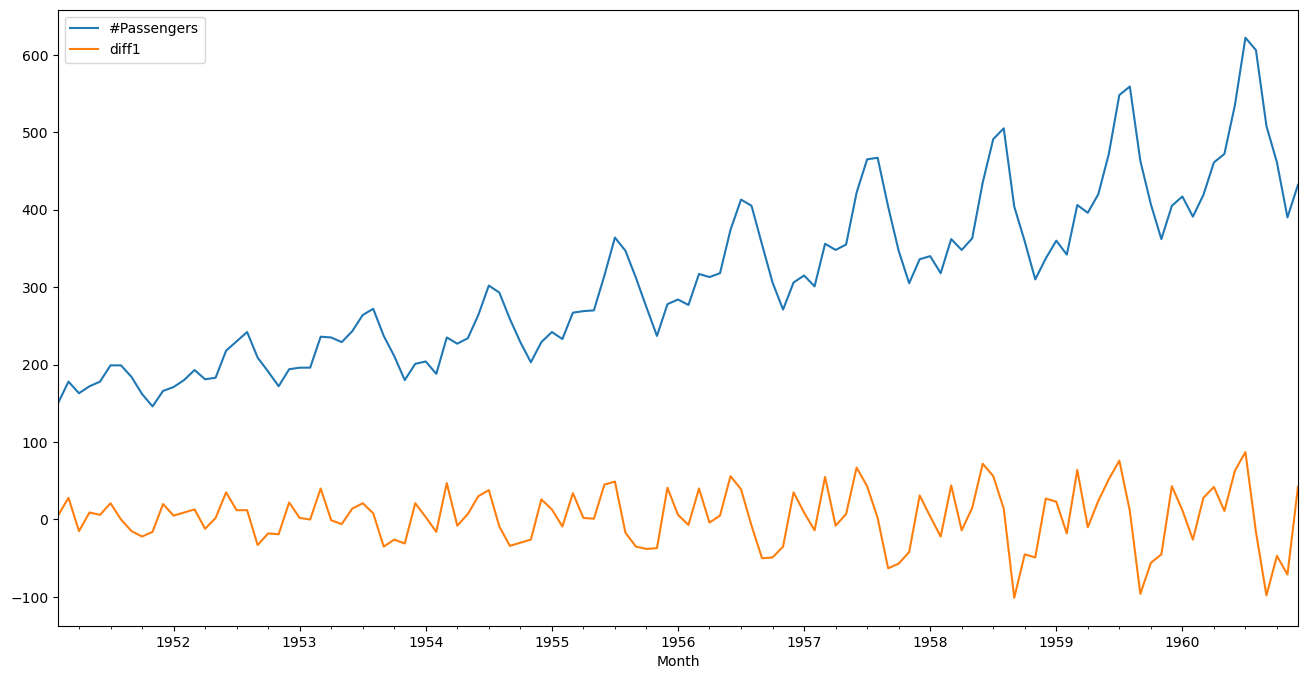

In [232]:
# diff1 
# Create a new column 'diff1' to store the first order differenced values
# This is done by subtracting the current value of '#Passengers' with the previous value (shifted by 1)
df['diff1'] = df['#Passengers'] - df['#Passengers'].shift(1)

# or using diff function 
df.dropna(inplace=True)
df[['#Passengers', 'diff1']].plot(label='DF', 
                                  figsize=(16, 8))

In [233]:
df = pd.read_csv(r"C:\Users\71589\Desktop\AirPassengers.csv") 
# Make sure your "Date" column is in datetime format
df['Month'] = pd.to_datetime(df['Month'])
 
# Sorting the data by date (if not sorted)
df = df.sort_values(by='Month')
 
# Resetting the index
df.set_index('Month', inplace=True)

df.dropna(inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [234]:

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

y_train = train_data['#Passengers']

y_test = test_data['#Passengers']

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
ADF Statistic: -2.88650585654497
p-value: 0.04693983572510758


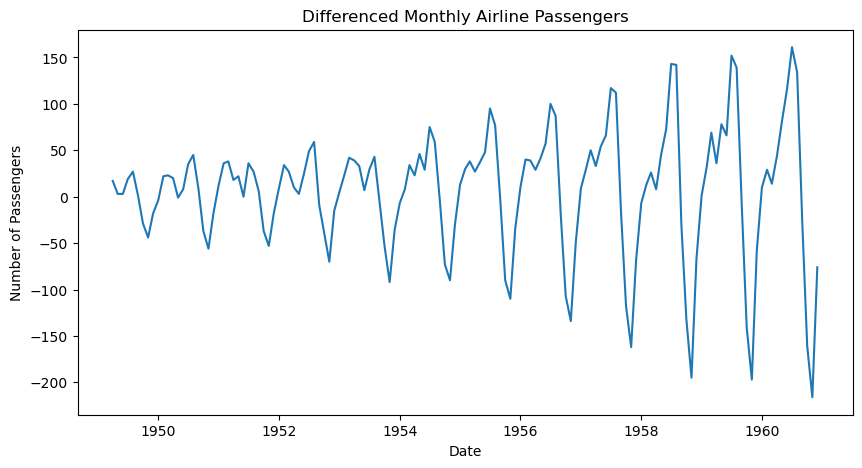

In [235]:

# Check for stationarity
result = adfuller(df['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
airline_data_diff = df.diff(3).dropna()

# Check for stationarity again
result = adfuller(airline_data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(airline_data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


In [237]:
#arma model


# Fit the ARMA(1, 1) model
arimamodel = ARIMA(airline_data_diff, order=(1, 0, 1))
model_fit = arimamodel.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  141
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -724.470
Date:                Tue, 23 Jul 2024   AIC                           1456.939
Time:                        11:10:03   BIC                           1468.734
Sample:                    04-01-1949   HQIC                          1461.732
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5482     13.428      0.488      0.626     -19.770      32.867
ar.L1          0.5059      0.055      9.200      0.000       0.398       0.614
ma.L1          0.6145      0.083      7.389      0.0

In [238]:
# Fit the ARIMA(1, 1, 0) model
arimamodel = ARIMA(y_train, order=(17, 2, 14))
model_fit = arimamodel.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:               ARIMA(17, 2, 14)   Log Likelihood                -413.649
Date:                Tue, 23 Jul 2024   AIC                            891.298
Time:                        11:10:53   BIC                            978.575
Sample:                    01-01-1949   HQIC                           926.714
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8447      0.766     -1.103      0.270      -2.346       0.656
ar.L2         -0.4800      0.628     -0.764      0.445      -1.711       0.751
ar.L3         -0.4657      0.482     -0.967      0.3

In [239]:
# Make predictions on the test set
y_pred = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
#print(y_pred)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R Squared Error: {r2:.2f}')


Mean Absolute Error: 22.96
Root Mean Squared Error: 27.22
R Squared Error: 0.88


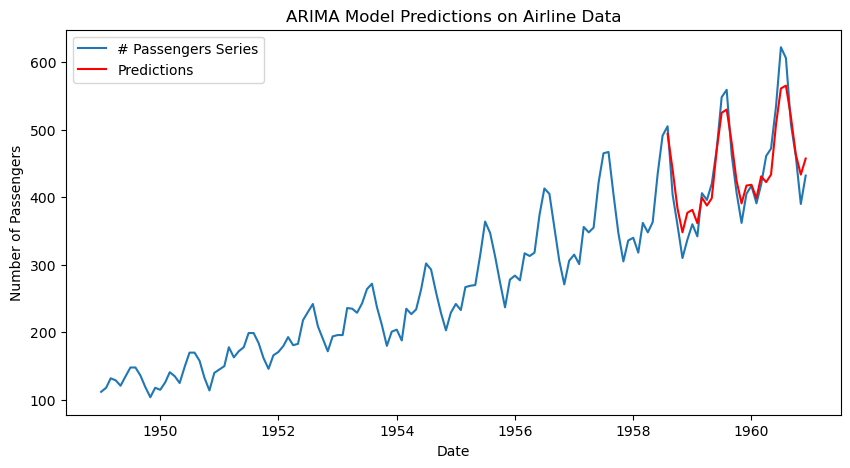

In [240]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(df, label='# Passengers Series')
plt.plot(y_pred, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()
